# **Forecasting Commercial Banks Transactions**

<ol><i>Authors</i>:
    <li>Nobert Akwir</li>
    <li>Karen Amanya</li>
    <li>Eugene Kuloba</li>
    <li>David Mwiti</li>
    <li>Anthony Nene</li>
</ol>

## **1. Business Understanding**

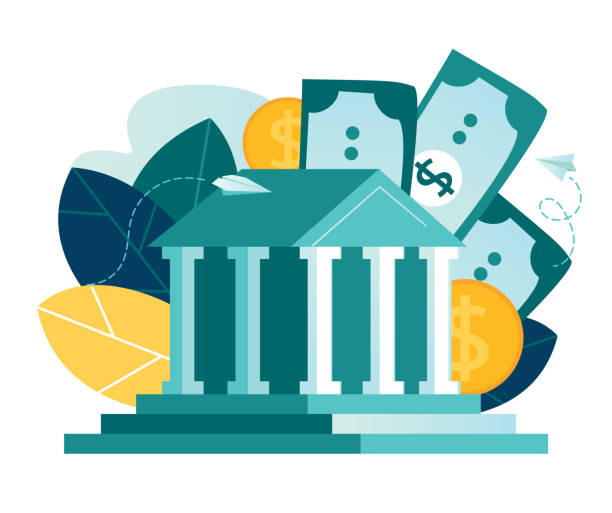

The Banking sector in Kenya has been seeing immense growth over the past few years, this being in direct relation to the penetration rate/ improved access to banking services by major banks we have in Kenya. From the Central Bank’s Financial access report(2021), 29.6% of the total population of Kenyans having formal access to bank services still used physical bank branches.

As this penetration rate has increased, the level of customer interaction and transactions at the branch level has also increased, hence leading to branches requesting more cash from their central vaults, and also repatriating more cash back to the central vault. This sometimes is not the norm, as the branches have to breach their vault limit due to more transactions by the customers even after repatriation is done(which are always in the morning hours), or even having requested less cash hence them not having enough cash to serve the customers.

The branches holding this excess cash leads the bank to incur more expenses as they have to take a cover for the excess cash, and also this is large risk exposure to the bank if the branches get hit. For the less cash perspective, this brings dissatisfaction to their customers and brings down the rating of the bank.

NCBA Bank is a commercial banking company that aims to conduct research to get findings that aid in confirming how much their branches should hold at specific periods in order for them to have sufficient funds to carry out its business with its customers and also not breach its vaults limits by too much.This project aims to develop a time series analysis model that will describe and forecast future transaction thresholds, to assist the bank’s branches identify the amount of cash they need at specific periods of time in order to prevent being over limit and also have satisfactory cash to serve their customers.


### **Objectives**

> #### **General Objective**
The general objective is to develop a model that will successfully forecast cash transactions that will help NCBA Bank maintain a sufficient cash at its specifc branches.
> #### **Specific Objectives**
<ul type='square'>
    <li >  </li>
    <li> </li>
    <li></li>
</ul>


### **Success Criteria**

## **2. Data Understanding**

The data used in this project is sources from data world. The data consists of demo bank transaction details(debits and credits) carried out by different customers and includes other details such as the amount, the mode of transaction(either cash, RTGS, EFT, SWIFT e.t.c), the account's balance at the time of the transation, the time of the transaction e.t.c

#### **Importing the required libraries**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller


In [97]:
#loading the data
raw_df = pd.read_csv('C:\\Users\\Karen\\Flatiron\\dsc-data-science-env-config\\course_materials\\Phase_4\\Datasets\\completedtrans.csv')

In [98]:
#shape of the df
raw_df.shape

(1056320, 16)

In [99]:
#A preview of the df
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25


In [100]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1056320 non-null  int64  
 1   trans_id          1056320 non-null  object 
 2   account_id        1056320 non-null  object 
 3   type              1056320 non-null  object 
 4   operation         873206 non-null   object 
 5   amount            1056320 non-null  float64
 6   balance           1056320 non-null  float64
 7   k_symbol          574439 non-null   object 
 8   bank              273508 non-null   object 
 9   account           295389 non-null   float64
 10  year              1056320 non-null  int64  
 11  month             1056320 non-null  int64  
 12  day               1056320 non-null  int64  
 13  fulldate          1056320 non-null  object 
 14  fulltime          1056320 non-null  object 
 15  fulldatewithtime  1056320 non-null  object 
dtype

From our objectives, the features we will need are the amount, operatio(which describe the nature of the transaction) and fulldate and fulltime features.
One thing we have to note, is that we will be only looking into transaction operations that deal with physical cash.

In [101]:
#converting all debit amounts to negatives
for index, row in raw_df.iterrows():
    if row['type'] == 'Debit':
        raw_df.loc[index,'amount'] = row['amount'] * -1
    else:
        pass

In [102]:
#setting the fulldate as the index
raw_df['fulldate'] = pd.to_datetime(raw_df['fulldate'])
raw_df = raw_df.set_index(['fulldate'])
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulltime,fulldatewithtime
fulldate,,,,,,,,,,,,,,,
2013-01-01,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,11:02:40,2013-01-01T11:02:40
2013-01-01,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,08:23:33,2013-01-01T08:23:33
2013-01-01,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,15:19:21,2013-01-01T15:19:21
2013-01-01,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,10:42:35,2013-01-01T10:42:35
2013-01-02,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,11:39:25,2013-01-02T11:39:25


In [103]:
relevant_cols = ['type', 'operation', 'amount']

#removing irrelevant columns
raw_df = raw_df[relevant_cols]

#removing operations not related to hard cash
raw_df = raw_df.loc[(raw_df['operation'] == 'Credit in Cash') | (raw_df['operation'] == 'Cash Withdrawal')]

#preview of the new df
print(raw_df.shape)
raw_df.head()

(591661, 3)


,type,operation,amount
fulldate,,,
2013-01-01,Credit,Credit in Cash,700.0
2013-01-01,Credit,Credit in Cash,900.0
2013-01-01,Credit,Credit in Cash,1000.0
2013-01-01,Credit,Credit in Cash,600.0
2013-01-02,Credit,Credit in Cash,400.0


In [104]:
#creating seperate columns for withdawals and credits
raw_df['credit_in_cash'] = raw_df['amount'].map(lambda x: x if x > 0 else 0)
raw_df['cash_withdrawal'] = raw_df['amount'].map(lambda x: x if x < 0 else 0)
raw_df.drop(columns = ['type','operation'], inplace = True)
raw_df.head()

,amount,credit_in_cash,cash_withdrawal
fulldate,,,
2013-01-01,700.0,700.0,0.0
2013-01-01,900.0,900.0,0.0
2013-01-01,1000.0,1000.0,0.0
2013-01-01,600.0,600.0,0.0
2013-01-02,400.0,400.0,0.0


In [105]:
#Downsampling the time series to days
raw_df = raw_df.resample('D').agg({'credit_in_cash':np.sum, 'cash_withdrawal':np.sum})
raw_df.head()

,credit_in_cash,cash_withdrawal
fulldate,,
2013-01-01,3200.0,0.0
2013-01-02,1500.0,0.0
2013-01-03,3700.0,0.0
2013-01-04,2600.0,0.0
2013-01-05,1100.0,0.0


In [106]:
#add closing balances for each day
raw_df['opening_balance'] = raw_df['credit_in_cash'].shift(1).fillna(0) - raw_df['cash_withdrawal'].shift(1).fillna(0)
raw_df['closing_balance'] = raw_df['opening_balance'] + raw_df['credit_in_cash'] - raw_df['cash_withdrawal']

In [109]:
raw_df.drop(columns = ['opening_balance'], axis = 1, inplace = True)
raw_df.head()

,credit_in_cash,cash_withdrawal,closing_balance
fulldate,,,
2013-01-01,3200.0,0.0,3200.0
2013-01-02,1500.0,0.0,4700.0
2013-01-03,3700.0,0.0,5200.0
2013-01-04,2600.0,0.0,6300.0
2013-01-05,1100.0,0.0,3700.0


### 3. EDA

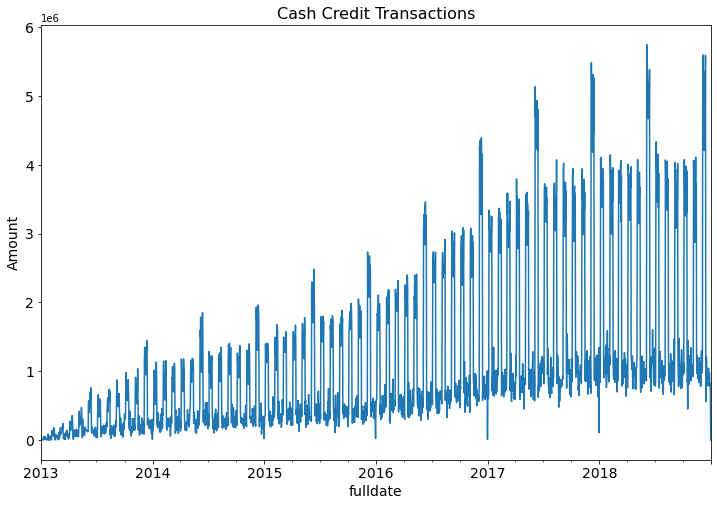

In [164]:
#Visualize transactions
plt.title('Cash Credit Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
raw_df['credit_in_cash'].plot(figsize = (12,8))
plt.show();

Observations

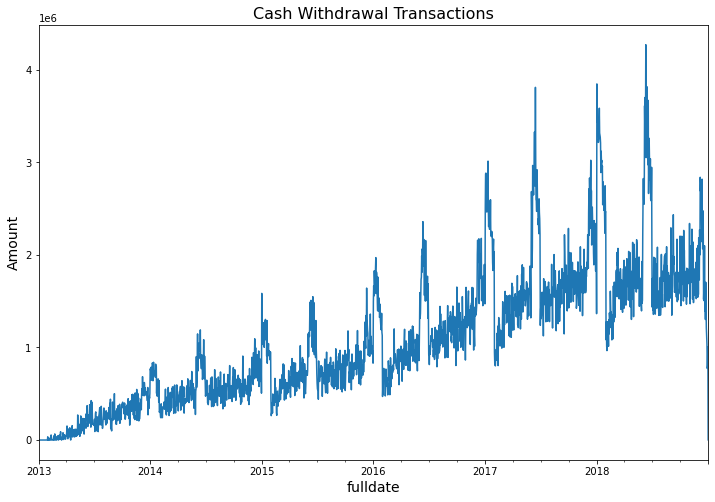

In [166]:
#Visualize transactions
plt.title('Cash Withdrawal Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
np.absolute(raw_df['cash_withdrawal']).plot(figsize = (12,8))
plt.show();

Observations

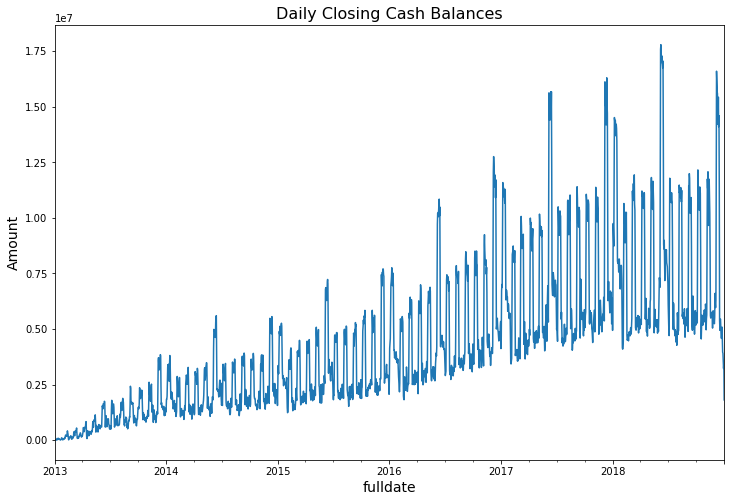

In [167]:
#Visualize closing balances
plt.title('Daily Closing Cash Balances', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
raw_df['closing_balance'].plot(figsize = (12,8))
plt.show();

Observations

In [168]:
#converting withdrawals to absolute values
raw_df['cash_withdrawal'] = np.absolute(raw_df['cash_withdrawal'])

In [169]:
### Checking for stationarity
result = adfuller(raw_df['credit_in_cash'])
print('Cash Credit Transations:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Cash Credit Transations:
ADF Statistic: -1.541502291453344
p-value: 0.5128900580290513
Critical Values:
	1%: -3.4333754500434264
	5%: -2.862876536558312
	10%: -2.56748150557262


In [170]:
### Checking for stationarity
result = adfuller(raw_df['cash_withdrawal'])
print('Cash Withdrawal Transations:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Cash Withdrawal Transations:
ADF Statistic: -3.56155086888802
p-value: 0.0065400957469309105
Critical Values:
	1%: -3.4333629045681398
	5%: -2.8628709972102797
	10%: -2.567478556227762


In [171]:
### Checking for stationarity
result = adfuller(raw_df['closing_balance'])
print('Closing Balances:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Closing Balances:
ADF Statistic: -1.6715019874002737
p-value: 0.44585206915685377
Critical Values:
	1%: -3.433372653139527
	5%: -2.8628753016111688
	10%: -2.567480848042739


<AxesSubplot:xlabel='fulldate'>

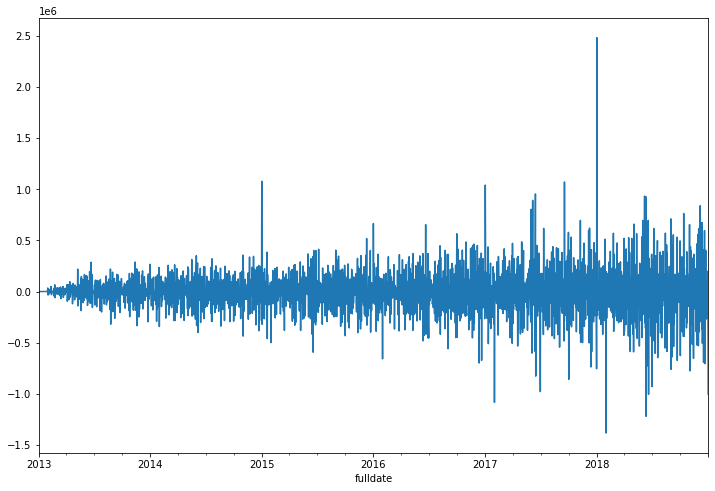

In [140]:
#using differencing to transform cash_withdrawl column
withdrawal_diff = raw_df['cash_withdrawal'].diff(periods = 1)
withdrawal_diff.plot(figsize=(12,8))

In [142]:
withdrawal_diff.dropna(inplace = True)

<AxesSubplot:xlabel='fulldate'>

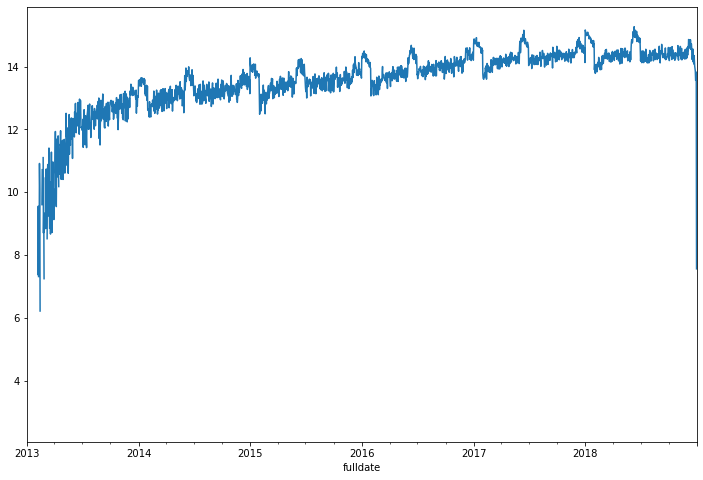

In [147]:
log_withdrawls = pd.Series(np.log(raw_df['cash_withdrawal']), index = raw_df.index )
log_withdrawls.plot(figsize = (12,8))

In [159]:
log_withdrawls = log_withdrawls.replace([np.inf, -np.inf], np.nan).dropna()

In [160]:
### Checking for stationarity
result = adfuller(log_withdrawls)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: -3.8489255663609763
p-value: 0.002444591162326055
Critical Values:
	1%: -3.433442700457683
	5%: -2.8629062300113994
	10%: -2.567497315483069
